In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
df_a = pd.read_csv("ERSA.csv")
df_d = pd.read_csv("ERSD.csv")
df_s = pd.read_csv("ERSS.csv")


In [3]:
from datetime import datetime
df_a["admission_date"] = df_a["ADMISSION_STATUS_DATE"].apply(lambda x: datetime.strptime(x, "%d-%b-%y"))

df_admission = df_a[["EMPLID","admission_date"]]
df_admission.shape

(83694, 2)

In [4]:
def QBXEncode(x):
    l = ['QBX']
    code = {"0" : "A", "1" : "B", "2" : "C","3":"T","4":"U","5":"V","6":"X","7":"Y","8":"Z","9":"K" }
    for i, v in enumerate(list(str(x)),start=1):
        if i % 2 ==0:
            l.append(code[str(v)])
        else:
            l.append(str(v))
    return "".join(l)

def get_clean_data(df):
    dfCBA=df[((df['STUDENT_COLLEGE_CODE']=='CBA') | (df['CLASS_COLLEGE_CODE']=='CBA')) & (df['STUDENT_ACAD_PROG_PRIMARY_CODE']=='UGD')]
    dfCBA = dfCBA.sort_values(by=['EMPLID','CLASS_TERM'])

    df_clean =dfCBA[['CTERM_TERM_LDESC','CLASS_TERM','EMPLID','STUDENT_ACAD_CAREER','STUDENT_ACAD_PROG_PRIM_LDESC','STUDENT_COLLEGE_CODE','STUDENT_DEPT_CODE','STUDENT_ACAD_PLAN','STUDENT_SUBACAD_PLAN',
             'CLASS_SID','CLASS_COLLEGE_CODE','CLASS_DEPT','CLASS_SUBDEPT','CLASS_I','CLASS_DESCR','ONLINE_COURSE','ENRL_UNITS_TAKEN','ENRL_GRADING_BASIS','ENRL_OFFICIAL_GRADE',
                  'CLASS_STDN_MTG_PAT','CLASSM_MEETING_TIME_START','CLASSM_MONDAY','CLASSM_TUESDAY',
                  'CLASSM_WEDNESDAY','CLASSM_THURSDAY','CLASSM_FRIDAY','CLASSM_SATURDAY','CLASSM_SUNDAY','STUDENT_TYPE_FINAL','RES_TUITION_RESIDENCY']]
    
    return df_clean

In [5]:
df_dataset_1 =pd.read_csv('dataset-Encrypted-2012-13.csv')
df_dataset_2 =pd.read_csv('dataset2-Encrypted-2012-13.csv')
print(df_dataset_1.shape)
print(df_dataset_2.shape)

df_dataset = pd.concat([df_dataset_1, df_dataset_2])
print(df_dataset.shape)
df1 = get_clean_data(df_dataset)
print(df1.shape)

(256112, 133)
(181396, 133)
(437508, 133)
(49882, 30)


In [6]:
df_encrypted_1=pd.read_csv('encrypted-2009-2012.csv')
df_encrypted_2=pd.read_csv('encrypted-2009-2012-part2.csv')

print(df_encrypted_1.shape)
print(df_encrypted_2.shape)
df_encrypted = pd.concat([df_encrypted_1, df_encrypted_2])
print(df_encrypted.shape)
df2 = get_clean_data(df_encrypted)
print(df2.shape)

(949153, 127)
(31060, 127)
(980213, 127)
(122476, 30)


In [7]:
df_spring = pd.read_csv('Spring2014dataset.csv', encoding="ISO-8859-1")
df = df_spring[((df_spring['STUDENT_COLLEGE_CODE']=='CBA') | (df_spring['CLASS_COLLEGE_CODE']=='CBA')) & (df_spring['STUDENT_ACAD_PROG_PRIMARY_CODE']=='UGD')]
df3 = df.sort_values(by=['EMPLID','CLASS_TERM'])
df3['EMPLID']= df3['EMPLID'].apply(lambda x: '{0:0>9}'.format(x))
def QBXEncode(x):
    l = ['QBX']
    code = {"0" : "A", "1" : "B", "2" : "C","3":"T","4":"U","5":"V","6":"X","7":"Y","8":"Z","9":"K" }
    for i, v in enumerate(list(str(x)),start=1):
        if i % 2 ==0:
            l.append(code[str(v)])
        else:
            l.append(str(v))
    return "".join(l)

#list
df3['EMPLID']=df3['EMPLID'].apply(QBXEncode)
df3=df3[['CTERM_TERM_LDESC','CLASS_TERM','EMPLID','STUDENT_ACAD_CAREER','STUDENT_ACAD_PROG_PRIM_LDESC','STUDENT_COLLEGE_CODE','STUDENT_DEPT_CODE','STUDENT_ACAD_PLAN','STUDENT_SUBACAD_PLAN',
             'CLASS_SID','CLASS_COLLEGE_CODE','CLASS_DEPT','CLASS_SUBDEPT','CLASS_I','CLASS_DESCR','ONLINE_COURSE','ENRL_UNITS_TAKEN','ENRL_GRADING_BASIS','ENRL_OFFICIAL_GRADE',
                  'CLASS_STDN_MTG_PAT','CLASSM_MEETING_TIME_START','CLASSM_MONDAY','CLASSM_TUESDAY',
                  'CLASSM_WEDNESDAY','CLASSM_THURSDAY','CLASSM_FRIDAY','CLASSM_SATURDAY','CLASSM_SUNDAY','STUDENT_TYPE_FINAL','RES_TUITION_RESIDENCY']]
print(df3.shape)

(15895, 30)


In [8]:
df_student_lvl=pd.read_csv('SECTION_STUDENT_LVL_DATA-2017-2014.csv')
df4 = get_clean_data(df_student_lvl)
print(df4.shape)

(113787, 30)


In [9]:
dataList = [df1,df2, df3,df4]
for data in dataList:
    print(data.shape)
dfCBA0 = pd.concat(dataList).sort_values(by=['EMPLID','CLASS_TERM'])
print(dfCBA0.shape)

(49882, 30)
(122476, 30)
(15895, 30)
(113787, 30)
(302040, 30)


In [10]:
dfCBA0["course_date"] = dfCBA0["CTERM_TERM_LDESC"].apply(lambda x: datetime.strptime(x.replace("Fall","09 01").replace("Spring","03 01").replace("Summer","06 01"), "%m %d %Y"))
#dfCBA1 = dfCBA0["course_date"].groupby(dfCBA0["EMPLID"]).agg(course_counts = 'count', start_date = np.min,  end_date = np.max )
dfCBA1 = dfCBA0["course_date"].groupby(dfCBA0["EMPLID"]).agg([('course_counts','count'), ('start_date', np.min),  ('end_date' , np.max )])
dfCBA = dfCBA0.merge(dfCBA1, on = ['EMPLID'], how ='left')
dfCBA.shape

(302040, 34)

In [87]:
import numpy as np

#select from 11 classes
cbaClassList = ["Business Communications","Business Finance","Business Statistics I","Business Strategy & Policy","International Business","Legal & Regulatry Env Business","Management Information Systems","Marketing","Organizational Behavior","Princip of Mgmt and Operations","Principles of Management"]
cbaClassCode = ['HRM 360', 'MKTG 300', 'MGMT 425', 'I S 310', 'MGMT 300', 'FIN 300', 'BLAW 320', 'I S 300', 'CBA 300', 'I S 301']
quantitativeList= ['FIN 300', 'I S 310']

dfCBA11 =  dfCBA[dfCBA['CLASS_DESCR'].isin(cbaClassList)]

#select only valid scores: ['A', 'B', 'C', 'D', 'F']
scoreDict = {"A" : 4, "B" : 3, "C" : 2, "D": 1, "F": 0}
scoreList = list(scoreDict.keys())
 
df =  dfCBA11[ dfCBA11['ENRL_OFFICIAL_GRADE'].isin(scoreList)]

majorList = ['Accountancy BS', 'Finance BS', 'Human Resources Management BS', 'International Business BS',  'Management BS',  'Marketing BS',  'Mgmt Info Systems BS', 'Oper Supply Chain Mgmt  BS', 'Operations Management BS']
df_ttest = df[df['STUDENT_ACAD_PLAN'].isin(majorList)]

df_ttest["score"] = df_ttest["ENRL_OFFICIAL_GRADE"].map(scoreDict)
df_ttest["lesson"] = df_ttest["CLASS_I"].apply(lambda x: x[:-3])  


df_ttest['units']= df_ttest['ENRL_UNITS_TAKEN'].apply(lambda x: int(x))
df_gpa = df_ttest.groupby('EMPLID').apply(lambda x: np.average(x["score"], weights = x["units"], axis = 0)).to_frame(name = 'GPA').reset_index()
df_ttest = df_ttest.merge(df_gpa, on = ['EMPLID'], how ='left')
print(df_ttest.shape)

df_quantGPA = df_ttest[['EMPLID', 'score', 'lesson']].loc[df_ttest['lesson'].isin(quantitativeList)]
df_quantGPA1 = df_quantGPA.groupby('EMPLID').agg({'score':'mean'}).rename(columns={'score':'quantGPA'}).reset_index()
df_ttest = df_ttest.merge(df_quantGPA1, on = ['EMPLID'], how ='left') 

df_ttest.head()
df_ttest.shape

(79917, 38)


(79917, 39)

# Class score description for Management Information Systems

In [12]:
def describe(className):
    df = df_ttest[ df_ttest['CLASS_DESCR']== className  ]
    return df.groupby(["STUDENT_ACAD_PLAN"])[["score"]].describe()

In [13]:
d = describe("Management Information Systems")
d

score                                          \
                                count      mean       std  min  25%  50%  75%   
STUDENT_ACAD_PLAN                                                               
Accountancy BS                 1781.0  2.824818  0.848443  0.0  2.0  3.0  3.0   
Finance BS                     1265.0  2.732016  0.848562  0.0  2.0  3.0  3.0   
Human Resources Management BS   361.0  2.645429  0.810718  0.0  2.0  3.0  3.0   
International Business BS       449.0  2.652561  0.834255  0.0  2.0  3.0  3.0   
Management BS                  1434.0  2.638773  0.847345  0.0  2.0  3.0  3.0   
Marketing BS                   1401.0  2.659529  0.815298  0.0  2.0  3.0  3.0   
Mgmt Info Systems BS            433.0  2.854503  0.852330  0.0  2.0  3.0  3.0   
Oper Supply Chain Mgmt  BS       85.0  2.858824  0.847306  0.0  2.0  3.0  3.0   
Operations Management BS         11.0  3.090909  0.831209  2.0  2.5  3.0  4.0   

                                    
                               max  
STUDENT_ACAD_PLAN                   
Accountancy BS                 4.0  
Finance BS                     4.0  
Human Resources Management BS  4.0  
International Business BS      4.0  
Management BS                  4.0  
Marketing BS                   4.0  
Mgmt Info Systems BS           4.0  
Oper Supply Chain Mgmt  BS     4.0  
Operations Management BS       4.0

# Hypothesis1 (New Method): Higher score for student in major class

For each major, do TTest on  avg(majorClass) vs avg(nonMajorClass)

• m = 2: HRM HRM 360

• m = 3: MGMT MGMT 300

• m = 4: MKTG MKTG 300

• m = 5: IB CBA 300-International business

• m = 6: IS IS 300; IS 310

• m = 7: FIN FIN 300

In [14]:
import scipy 
import scipy.stats
import numpy as np

majorList.sort()

def run_ttest_on_class_major(classCode, major):
    df = df_ttest[ df_ttest['STUDENT_ACAD_PLAN']== major  ]
    df = df[ df['lesson'].isin(cbaClassCode)]
    
    if major != 'Mgmt Info Systems BS':
        group1 = df[ df['lesson'] == classCode ]
        group2 = df[ df['lesson'] != classCode ]
    else:
        group1 = df[  df['lesson'].isin(['I S 300', 'I S 310'])] 
        group2 = df[ ~df['lesson'].isin(['I S 300', 'I S 310'])] 
    
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean(), group1["score"].count(), group2["score"].count())

majorClassList = [('Human Resources Management BS', 'HRM 360'), ('Management BS', 'MGMT 300'), ('Marketing BS', 'MKTG 300'), \
                  ('International Business BS','CBA 300'), ('Mgmt Info Systems BS', 'IS300/IS 310'), ('Finance BS', 'FIN 300')]
     
t_test_results = {}
scores = {}
for  majorName, className in majorClassList:
    t_test_results[majorName + " : " + className], scores[majorName + " : " + className] = run_ttest_on_class_major(className, majorName)

#print(t_test_results)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['majorClassScore'] = scores_df[0].to_numpy()
results_df['nonMajorClassScore'] = scores_df[1].to_numpy()
results_df['majorClassCount'] = scores_df[2].to_numpy()
results_df['nonMajorClassCount'] = scores_df[3].to_numpy()
results_df

,statistic,pvalue,majorClassScore,nonMajorClassScore,majorClassCount,nonMajorClassCount
Human Resources Management BS : HRM 360,-0.994884,3.198575e-01,2.557292,2.606124,384,3331
Management BS : MGMT 300,-1.176587,2.393776e-01,2.564351,2.590806,1857,14553
Marketing BS : MKTG 300,2.271476,2.313191e-02,2.642953,2.588261,1490,13902
International Business BS : CBA 300,-4.665107,3.162630e-06,2.444444,2.634775,576,4578
Mgmt Info Systems BS : IS300/IS 310,-0.586120,5.578234e-01,2.628889,2.648973,900,3749
Finance BS : FIN 300,6.091207,1.150127e-09,2.851661,2.692491,1355,12572


# Hypothesis1 (Old Method): Higher score for major student


For each course, do TTest on avg(majorStudent take major class Score) vs avg(nonMajorStudent take major class score)

• m = 2: HRM HRM 360

• m = 3: MGMT MGMT 300

• m = 4: MKTG MKTG 300

• m = 5: IB CBA 300-International business

• m = 6: IS IS 300; IS 310

• m = 7: FIN FIN 300

In [15]:
import scipy 
import scipy.stats
import numpy as np

majorList.sort()

def run_ttest_on_class_major(classCode, major):
    df = df_ttest[ df_ttest['lesson']== classCode  ]
    
    if major == 'Mgmt Info Systems BS':
        df = df_ttest[ df_ttest['lesson'].isin(['I S 300', 'I S 310']) ]
    else:
        df = df_ttest[ df_ttest['lesson']== classCode  ]
    group1 = df[ df['STUDENT_ACAD_PLAN'] == major ]
    group2 = df[ df['STUDENT_ACAD_PLAN'] != major ]
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean(), group1["score"].count(), group2["score"].count())

majorClassList = [('Human Resources Management BS', 'HRM 360'), ('Management BS', 'MGMT 300'), ('Marketing BS', 'MKTG 300'), \
                  ('International Business BS','CBA 300'), ('Mgmt Info Systems BS', 'IS 300/310'), ('Finance BS', 'FIN 300')]
     
t_test_results = {}
scores = {}
for  majorName, className in majorClassList:
    t_test_results[className + " : " + majorName], scores[className + " : " + majorName ] = run_ttest_on_class_major(className, majorName)

#print(t_test_results)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['majorScore'] = scores_df[0].to_numpy()
results_df['nonMajorScore'] = scores_df[1].to_numpy()
results_df

,statistic,pvalue,majorScore,nonMajorScore
HRM 360 : Human Resources Management BS,-0.455351,6.488684e-01,2.557292,2.580923
MGMT 300 : Management BS,-4.078622,4.571056e-05,2.564351,2.660422
MKTG 300 : Marketing BS,-0.432440,6.654329e-01,2.642953,2.653528
CBA 300 : International Business BS,-0.701952,4.827293e-01,2.444444,2.473967
IS 300/310 : Mgmt Info Systems BS,1.208981,2.266892e-01,2.628889,2.591015
FIN 300 : Finance BS,5.078887,3.880284e-07,2.851661,2.693636


# Hypothesis 2: Class schedule time on Class Score

## Daytime: before 18:00 vs Night: after 18:00

AllClass: all class combined

In [16]:
df_ttest["hour"] = df_ttest["CLASSM_MEETING_TIME_START"].str.split(":").str[0]
df_ttest['hour'] = df_ttest['hour'].replace(np.nan, 0)

df_ttest["morning"] = df_ttest["hour"].apply(lambda x: 1 if int(x) < 12 else  0)
df_ttest["afternoon"] = df_ttest["hour"].apply(lambda x: 1 if int(x) >= 12 and int(x) < 18 else  0)
df_ttest["night"] = df_ttest["hour"].apply(lambda x: 1 if int(x) >= 18  else  0)

df_ttest["dayhour"] = df_ttest["hour"].apply(lambda x: 1 if int(x) < 18 else  0)
 
cbaClassCode = ['HRM 360', 'MKTG 300', 'MGMT 425', 'MGMT 300', 'FIN 300', 'BLAW 320', 'I S 300', 'CBA 300', 'I S 301']    
    
def run_ttest_class_time(classCode, dayTime):
    if classCode == "AllClass":
        df = df_ttest 
    else:
        df = df_ttest[ df_ttest['lesson']== classCode  ]
    
    group1 = df[ df[dayTime] == 1 ]
    group2 = df[ df[dayTime] == 0 ]
    
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean(), group1["score"].count(), group2["score"].count())    

cbaClassCode = ['AllClass', 'HRM 360', 'MKTG 300', 'MGMT 425', 'I S 310', 'MGMT 300', 'FIN 300', 'BLAW 320', 'I S 300', 'CBA 300', 'I S 301']

t_test_results = {}
scores = {}

for classCode in cbaClassCode:
    for dayTime in ["dayhour"]:
        t_test_results[classCode + " : " + dayTime], scores[classCode + " : " + dayTime] = run_ttest_class_time(classCode, dayTime)
    
#print(t_test_results)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['inTimePeriod'] = scores_df[0].to_numpy()
results_df['outTimePeriod'] = scores_df[1].to_numpy()

results_df['inTimeCount'] = scores_df[2].to_numpy()
results_df['outTimeOut'] = scores_df[3].to_numpy()

results_df

,statistic,pvalue,inTimePeriod,outTimePeriod,inTimeCount,outTimeOut
AllClass : dayhour,1.268250,2.047123e-01,2.670808,2.660967,62137,17780
HRM 360 : dayhour,8.170047,3.538951e-16,2.626759,2.411536,6465,1803
MKTG 300 : dayhour,0.455407,6.488284e-01,2.654195,2.644465,5960,2177
MGMT 425 : dayhour,-0.711404,4.768564e-01,2.857825,2.874572,5866,1459
I S 310 : dayhour,2.635469,8.418765e-03,2.491647,2.428571,5567,2226
MGMT 300 : dayhour,9.952185,3.289083e-23,2.703611,2.495855,5982,2654
FIN 300 : dayhour,-7.820153,5.932659e-15,2.669024,2.880142,6221,1969
BLAW 320 : dayhour,-0.530730,5.956206e-01,2.929708,2.942628,6473,1621
I S 300 : dayhour,-7.627947,2.690978e-14,2.683806,2.869507,5718,1502
CBA 300 : dayhour,-3.087722,2.023695e-03,2.459843,2.562955,7259,961


## Daytime: before 12:00 vs aternoon + night


In [17]:
t_test_results = {}
scores = {}

for classCode in cbaClassCode:
    for dayTime in ["morning"]:
        t_test_results[classCode + " : " + dayTime], scores[classCode + " : " + dayTime] = run_ttest_class_time(classCode, dayTime)
    
#print(t_test_results)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['inTimePeriod'] = scores_df[0].to_numpy()
results_df['outTimePeriod'] = scores_df[1].to_numpy()

results_df['inTimeCount'] = scores_df[2].to_numpy()
results_df['outTimeOut'] = scores_df[3].to_numpy()

results_df

,statistic,pvalue,inTimePeriod,outTimePeriod,inTimeCount,outTimeOut
AllClass : morning,-0.074680,9.404698e-01,2.668255,2.668778,24350,55567
HRM 360 : morning,1.399460,1.617126e-01,2.603758,2.570066,2395,5873
MKTG 300 : morning,4.085082,4.448408e-05,2.737110,2.634172,1377,6760
MGMT 425 : morning,-3.955604,7.706167e-05,2.802481,2.884682,2096,5229
I S 310 : morning,-1.320553,1.866892e-01,2.454864,2.484498,2858,4935
MGMT 300 : morning,5.420043,6.119152e-08,2.699973,2.594138,3723,4913
FIN 300 : morning,-8.316332,1.053476e-16,2.575854,2.783674,2518,5672
BLAW 320 : morning,-1.379127,1.678939e-01,2.913731,2.942018,2782,5312
I S 300 : morning,4.318696,1.590540e-05,2.801092,2.699156,1649,5571
CBA 300 : morning,2.353575,1.861729e-02,2.514979,2.457087,2103,6117


## Afternoon   vs Morning + Night


In [18]:
t_test_results = {}
scores = {}

for classCode in cbaClassCode:
    for dayTime in ["afternoon"]:
        t_test_results[classCode + " : " + dayTime], scores[classCode + " : " + dayTime] = run_ttest_class_time(classCode, dayTime)
    
#print(t_test_results)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['inTimePeriod'] = scores_df[0].to_numpy()
results_df['outTimePeriod'] = scores_df[1].to_numpy()

results_df['inTimeCount'] = scores_df[2].to_numpy()
results_df['outTimeOut'] = scores_df[3].to_numpy()

results_df

,statistic,pvalue,inTimePeriod,outTimePeriod,inTimeCount,outTimeOut
AllClass : afternoon,1.125370,2.604358e-01,2.672453,2.665179,37787,42130
HRM 360 : afternoon,5.461330,4.863011e-08,2.640295,2.521201,4070,4198
MKTG 300 : afternoon,-2.679778,7.381929e-03,2.629282,2.680360,4583,3554
MGMT 425 : afternoon,3.006635,2.650528e-03,2.888594,2.832068,3770,3555
I S 310 : afternoon,3.838628,1.247031e-04,2.530454,2.443352,2709,5084
MGMT 300 : afternoon,4.295955,1.758486e-05,2.709606,2.615023,2259,6377
FIN 300 : afternoon,0.988470,3.229515e-01,2.732379,2.709383,3703,4487
BLAW 320 : afternoon,0.888563,3.742645e-01,2.941750,2.924370,3691,4403
I S 300 : afternoon,-9.936211,4.074570e-23,2.636274,2.833704,4069,3151
CBA 300 : afternoon,-4.178149,2.969332e-05,2.437355,2.530026,5156,3064


# Hypothesis 2: (Old Method) Class schedule time on Class Score


In [19]:
df_ttest["hour"] = df_ttest["CLASSM_MEETING_TIME_START"].str.split(":").str[0]
df_ttest['hour'] = df_ttest['hour'].replace(np.nan, 0)

df_ttest["morning"] = df_ttest["hour"].apply(lambda x: 1 if int(x) < 12 else  0)
df_ttest["afternoon"] = df_ttest["hour"].apply(lambda x: 1 if int(x) >= 12 and int(x) < 18 else  0)
df_ttest["night"] = df_ttest["hour"].apply(lambda x: 1 if int(x) >= 18  else  0)
 
cbaClassCode = ['HRM 360', 'MKTG 300', 'MGMT 425', 'I S 310', 'MGMT 300', 'FIN 300', 'BLAW 320', 'I S 300', 'CBA 300', 'I S 301']    
    
def run_ttest_class_time(classCode, dayTime):
    if classCode != "AllClass":
        df = df_ttest[ df_ttest['lesson']== classCode  ]
    else:
        df = df_ttest 
    
    group1 = df[ df[dayTime] == 1 ]
    group2 = df[ df[dayTime] == 0 ]
    
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean(), group1["score"].count(), group2["score"].count())    

cbaClassCode = ['AllClass', 'HRM 360', 'MKTG 300', 'MGMT 425', 'I S 310', 'MGMT 300', 'FIN 300', 'BLAW 320', 'I S 300', 'CBA 300', 'I S 301']

t_test_results = {}
scores = {}

for classCode in cbaClassCode:
    for dayTime in ["morning", "afternoon", "night"]:
        t_test_results[classCode + " : " + dayTime], scores[classCode + " : " + dayTime] = run_ttest_class_time(classCode, dayTime)
    
#print(t_test_results)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['inTimePeriod'] = scores_df[0].to_numpy()
results_df['outTimePeriod'] = scores_df[1].to_numpy()

results_df['inTimeCount'] = scores_df[2].to_numpy()
results_df['outTimeOut'] = scores_df[3].to_numpy()

results_df

,statistic,pvalue,inTimePeriod,outTimePeriod,inTimeCount,outTimeOut
AllClass : morning,-0.074680,9.404698e-01,2.668255,2.668778,24350,55567
AllClass : afternoon,1.125370,2.604358e-01,2.672453,2.665179,37787,42130
AllClass : night,-1.268250,2.047123e-01,2.660967,2.670808,17780,62137
HRM 360 : morning,1.399460,1.617126e-01,2.603758,2.570066,2395,5873
HRM 360 : afternoon,5.461330,4.863011e-08,2.640295,2.521201,4070,4198
HRM 360 : night,-8.170047,3.538951e-16,2.411536,2.626759,1803,6465
MKTG 300 : morning,4.085082,4.448408e-05,2.737110,2.634172,1377,6760
MKTG 300 : afternoon,-2.679778,7.381929e-03,2.629282,2.680360,4583,3554
MKTG 300 : night,-0.455407,6.488284e-01,2.644465,2.654195,2177,5960
MGMT 425 : morning,-3.955604,7.706167e-05,2.802481,2.884682,2096,5229


# Hypothesis 2: Different class time has score difference

In [20]:
df_ttest["hour"] = df_ttest["CLASSM_MEETING_TIME_START"].str.split(":").str[0]
df_ttest['hour'] = df_ttest['hour'].replace(np.nan, 0)

df_ttest["morning"] = df_ttest["hour"].apply(lambda x: 1 if int(x) < 12 else  0)
df_ttest["afternoon"] = df_ttest["hour"].apply(lambda x: 1 if int(x) >= 12 and int(x) < 18 else  0)
df_ttest["night"] = df_ttest["hour"].apply(lambda x: 1 if int(x) >= 18  else  0)

def run_ttest_on_day_time(dayTime):
    group1 = df_ttest[ df_ttest[dayTime] == 1 ]
    group2 = df_ttest[ df_ttest[dayTime] == 0 ]
    
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean(),  group1["score"].count(), group2["score"].count() )
 
t_test_results = {}
scores = {}
for dayTime in ["morning", "afternoon", "night"]:
    t_test_results[dayTime], scores[dayTime] = run_ttest_on_day_time(dayTime)

results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['inPeriodScore'] = scores_df[0].to_numpy()
results_df['outPeriodScore'] = scores_df[1].to_numpy()
results_df['inTimeCount'] = scores_df[2].to_numpy()
results_df['outTimeCount'] = scores_df[3].to_numpy()
results_df

,statistic,pvalue,inPeriodScore,outPeriodScore,inTimeCount,outTimeCount
morning,-0.07468,0.940470,2.668255,2.668778,24350,55567
afternoon,1.12537,0.260436,2.672453,2.665179,37787,42130
night,-1.26825,0.204712,2.660967,2.670808,17780,62137


# Hypothesis 3: Students take 2 or more quantitative classes in one semester has lower average score (of quant classes taken in the period)



In [21]:
df_ttest["quantitative"] = df_ttest['lesson'].apply(lambda x: 1 if x in quantitativeList else  0)
df1 = df_ttest[ df_ttest['lesson'].isin(quantitativeList) ]
df2 = df1[["EMPLID", 'CTERM_TERM_LDESC', 'quantitative', 'lesson','score']].drop_duplicates().sort_values('EMPLID')

#print(df.tail(100))

df3 = df2.groupby(['EMPLID', 'CTERM_TERM_LDESC'])['quantitative'].sum().reset_index().rename(columns={'quantitative':'sum_quantitative'})
df_hyp3 = df1.merge(df3, on = ['EMPLID','CTERM_TERM_LDESC'], how ='left')

df_hyp3.describe()

,course_counts,score,units,GPA,quantGPA,morning,afternoon,night,dayhour,quantitative,sum_quantitative
count,15983.000000,15983.000000,15983.0,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.000000,15983.0,15983.000000
mean,23.883501,2.599762,3.0,2.668404,2.599762,0.336357,0.401176,0.262466,0.737534,1.0,1.170181
std,10.614810,1.011035,0.0,0.625187,0.877100,0.472478,0.490152,0.439989,0.439989,0.0,0.375803
min,1.000000,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,17.000000,2.000000,3.0,2.250000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,22.000000,3.000000,3.0,2.666667,2.500000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
75%,29.000000,3.000000,3.0,3.100000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
max,82.000000,4.000000,3.0,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.000000


In [22]:
df_ttest["quantitative"] = df_ttest['lesson'].apply(lambda x: 1 if x in quantitativeList else  0)
df = df_ttest[ df_ttest['lesson'].isin(quantitativeList) ]

#print(df.tail(100))

df2 = df.groupby(['EMPLID', 'CTERM_TERM_LDESC'])['quantitative'].sum().reset_index().rename(columns={'quantitative':'sum_quantitative'})
df_hyp3 = df.merge(df2, on = ['EMPLID','CTERM_TERM_LDESC'], how ='left')


def run_ttest_on_quant(df_hyp3):
    group1 = df_hyp3[ df_hyp3["sum_quantitative"] >= 2 ]
    group2 = df_hyp3[ df_hyp3["sum_quantitative"] <  2 ]
    
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean(),  group1["score"].count(), group2["score"].count())
 
t_test_results = {}
scores = {}
t_test_results["Hypothesis3"], scores["Hypothesis3"] = run_ttest_on_quant(df_hyp3)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')
results_df['MoreQuantClassScore'] = scores_df[0].to_numpy()
results_df['LessQuantClassScore'] = scores_df[1].to_numpy()
results_df['countStudentMoreQuant'] = scores_df[2].to_numpy()
results_df['countStudentLessQuant'] = scores_df[3].to_numpy()
results_df

,statistic,pvalue,MoreQuantClassScore,LessQuantClassScore,countStudentMoreQuant,countStudentLessQuant
Hypothesis3,1.08674,0.277168,2.616394,2.595221,3428,12555


# Hypothesis 3b: Students take 2 or more quantitative classes in one semester has lower average score (of all classes taken in the period)

In [23]:
df_ttest["quantitative"] = df_ttest['lesson'].apply(lambda x: 1 if x in quantitativeList else  0)
df = df_ttest[ df_ttest['lesson'].isin(quantitativeList) ]

#print(df.tail(100))

df2 = df.groupby(['EMPLID', 'CTERM_TERM_LDESC'])['quantitative'].sum().reset_index().rename(columns={'quantitative':'sum_quantitative'})
df_hyp3b = df_ttest.merge(df2, on = ['EMPLID','CTERM_TERM_LDESC'], how ='left')

 
t_test_results = {}
scores = {}
t_test_results["Hypothesis3B"], scores["Hypothesis3B"] = run_ttest_on_quant(df_hyp3b)
results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')
results_df['MoreQuantClassScore'] = scores_df[0].to_numpy()
results_df['LessQuantClassScore'] = scores_df[1].to_numpy()
results_df['countStudentMoreQuant'] = scores_df[2].to_numpy()
results_df['countStudentLessQuant'] = scores_df[3].to_numpy()
results_df

,statistic,pvalue,MoreQuantClassScore,LessQuantClassScore,countStudentMoreQuant,countStudentLessQuant
Hypothesis3B,-0.921037,0.357037,2.650127,2.662297,5885,30894


# Hypothesis 4: Which Major has higher quantitive class GPA?

In [24]:
df_hyp4 = df_ttest[['EMPLID', 'quantGPA', 'STUDENT_ACAD_PLAN']].loc[df_ttest["quantGPA"].notnull()]
df_hyp4 = df_hyp4.drop_duplicates() 
print(df_hyp4.shape)

df_hyp4["major_mis"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Mgmt Info Systems BS' else  0) 
df_hyp4["major_fin"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Finance BS' else  0) 
df_hyp4["major_acc"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Accountancy BS' else  0) 
df_hyp4["major_mrk"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Marketing BS' else  0) 
df_hyp4["major_mgmt"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Management BS' else  0) 
df_hyp4["major_hrm"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Human Resources Management BS' else  0) 
df_hyp4["major_oscm"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'Oper Supply Chain Mgmt  BS' or x == 'Operations Management BS' else  0) 
df_hyp4["major_ib"] = df_hyp4["STUDENT_ACAD_PLAN"].apply(lambda x: 1 if x == 'International Business BS' else  0) 

def run_ttest_on_major(major):
    group1 = df_hyp4[ df_hyp4[major] == 1 ]
    group2 = df_hyp4[ df_hyp4[major] == 0 ]
    
    return scipy.stats.ttest_ind(group1['quantGPA'], group2['quantGPA']), (group1["quantGPA"].mean(), group2["quantGPA"].mean())
 
t_test_results = {}
scores = {}
for major in ["major_mis", "major_fin", "major_acc", "major_mrk", "major_mgmt", "major_hrm", "major_oscm", "major_ib"]:
    t_test_results[major], scores[major] = run_ttest_on_major(major)

results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
scores_df = pd.DataFrame.from_dict(scores, orient='Index')

results_df['majorQuantGPA'] = scores_df[0].to_numpy()
results_df['otherMajorQuantGPA'] = scores_df[1].to_numpy()
results_df


(10873, 3)


,statistic,pvalue,majorQuantGPA,otherMajorQuantGPA
major_mis,-0.329050,7.421244e-01,2.600533,2.612716
major_fin,7.454409,9.713697e-14,2.748917,2.582023
major_acc,12.932327,5.632823e-38,2.806750,2.549197
major_mrk,-9.566142,1.349536e-21,2.442313,2.651731
major_mgmt,-7.313729,2.781170e-13,2.486892,2.643611
major_hrm,-4.450737,8.642829e-06,2.444547,2.620785
major_oscm,-1.218488,2.230652e-01,2.527944,2.613327
major_ib,-2.112538,3.466308e-02,2.541544,2.616717


# Hypothesis 5: Students in junior year taking quantitative class have lower score, using addmision date as first day

In [173]:
from datetime import timedelta
    
df_5 = df_ttest.merge(df_admission, on = ['EMPLID'], how ='left')
 
#print(df_ttest.shape)
#df_5["course_date"] = df_5["CTERM_TERM_LDESC"].apply(lambda x: datetime.strptime(x.replace("Fall","09 01").replace("Spring","01 01"), "%m %d %Y"))
df_5["start_time"]  = df_5.course_date - df_5.admission_date
df_5["junior_year"] = df_5["start_time"].apply(lambda x: 1 if x <  timedelta(days=365*3  ) else 0)

df_5 = df_5.loc[df_5["admission_date"].notnull()]
df_5 = df_5.loc[df_5["quantitative"] == 1]

#hist = df_5["junior_year"].hist(bins=10)

#print(df_5[["CTERM_TERM_LDESC", "course_date", "admission_date", "start_time", "junior_year", "quantitative"]])

def run_ttest_on_h5(df):
    group1 = df[ df["junior_year"] == 1 ]
    group2 = df[ df["junior_year"] == 0 ]
    print(df.shape,  group1.shape, group2.shape)
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean())

def run_hypothesis5(lesson):
    t_test_results = {}
    scores = {}
    if lesson == "QuantGPA":
        t_test_results["Hypothesis5"], scores["Hypothesis5"] = run_ttest_on_h5(df_5)
    else:
        t_test_results["Hypothesis5"], scores["Hypothesis5"] = run_ttest_on_h5(df_5.loc[df_5["lesson"] == lesson])
 
    results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
    scores_df = pd.DataFrame.from_dict(scores, orient='Index')
    results_df['Junior'] = scores_df[0].to_numpy()
    results_df['Senior'] = scores_df[1].to_numpy()
    results_df['Class Name'] = lesson
    return results_df
    
df_hp5_gpa = run_hypothesis5("QuantGPA")
df_hp5_fin300 = run_hypothesis5("FIN 300")
#df_hp5_is300 = run_hypothesis5("I S 300")
df_hp5_is310 = run_hypothesis5("I S 310")

df_dataset = pd.concat([df_hp5_gpa, df_hp5_fin300, df_hp5_is310])
df_dataset


KeyError: 'quantitative'

# Hypothesis 5 : (New) using first class date as first day.  Students in junior year taking quantitative class have lower score

In [26]:
from datetime import timedelta

df_hyp5 = df_ttest

df_hyp5["course_start_time"]  = df_hyp5.course_date - df_hyp5.start_date
df_hyp5['study_length'] = df_hyp5.end_date - df_hyp5.start_date 
df_hyp5["junior_year"] = df_hyp5["course_start_time"].apply(lambda x: 1 if x <=  timedelta(days=365*2) else 0)

df_hyp51 = df_hyp5.loc[(df_hyp5['study_length'] >= timedelta(days=365*2)) & (df_hyp5['course_counts'] >=2)]
df_hyp51 = df_hyp51.loc[df_hyp51["quantitative"] == 1]

#hist = df_hyp51["course_counts"].hist(bins=10)
#print(df_hyp51.shape)

def run_ttest_on_h5(df):
 
    group1 = df[ df["junior_year"] == 1 ]
    group2 = df[ df["junior_year"] == 0 ]
    print(df.shape,  group1.shape, group2.shape)
    return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean())

def run_hypothesis5(lesson):
    t_test_results = {}
    scores = {}
    if lesson == "QuantGPA":
        t_test_results["Hypothesis5"], scores["Hypothesis5"] = run_ttest_on_h5(df_hyp51)
    else:
        t_test_results["Hypothesis5"], scores["Hypothesis5"] = run_ttest_on_h5(df_hyp51.loc[df_hyp51["lesson"] == lesson])
 
    results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
    scores_df = pd.DataFrame.from_dict(scores, orient='Index')
    results_df['Junior'] = scores_df[0].to_numpy()
    results_df['Senior'] = scores_df[1].to_numpy()
    results_df['Class Name'] = lesson
    return results_df
    
df_hp5_gpa = run_hypothesis5("QuantGPA")
df_hp5_fin300 = run_hypothesis5("FIN 300")
#df_hp5_is300 = run_hypothesis5("I S 300")
df_hp5_is310 = run_hypothesis5("I S 310")

df_dataset = pd.concat([df_hp5_gpa, df_hp5_fin300, df_hp5_is310])
df_dataset

(10690, 48) (7073, 48) (3617, 48)
(5417, 48) (3928, 48) (1489, 48)
(5273, 48) (3145, 48) (2128, 48)


,statistic,pvalue,Junior,Senior,Class Name
Hypothesis5,7.898981,3.087824e-15,2.622367,2.460050,QuantGPA
Hypothesis5,6.051256,1.533664e-09,2.734470,2.541303,FIN 300
Hypothesis5,2.981601,2.880565e-03,2.482353,2.403195,I S 310


# Hypothesis 5: Students in junior year taking quantitative class have lower score, using addmision date as first day (OverAllGPA)

In [27]:
from datetime import timedelta

#df_50["course_date"] = df_ttest["CTERM_TERM_LDESC"].apply(lambda x: datetime.strptime(x.replace("Fall","09 01").replace("Spring","01 01"), "%m %d %Y"))
df_5["start_time"]  = df_5.course_date - df_5.admission_date
df_5["junior_year"] = df_5["start_time"].apply(lambda x: 1 if x <  timedelta(days=365*3) else 0)
df_5 = df_5.loc[df_5["admission_date"].notnull()]
df_5 = df_5.loc[df_5["quantitative"] == 1]

#print(df_5[["CTERM_TERM_LDESC", "course_date", "admission_date", "start_time", "junior_year", "quantitative"]])

def run_ttest_on_h5(df, check_gpa = False):
 
    group1 = df[ df["junior_year"] == 1 ]
    group2 = df[ df["junior_year"] == 0 ]
    print(df.shape,  group1.shape, group2.shape)
    if check_gpa:
        return scipy.stats.ttest_ind(group1['GPA'], group2['GPA']), (group1["GPA"].mean(), group2["GPA"].mean())
    else:
        return scipy.stats.ttest_ind(group1['score'], group2['score']), (group1["score"].mean(), group2["score"].mean())

def run_hypothesis5(lesson):
    t_test_results = {}
    scores = {}
    if lesson == "OverAllGPA":
        t_test_results["Hypothesis5"], scores["Hypothesis5"] = run_ttest_on_h5(df_5, True)
    else:
        t_test_results["Hypothesis5"], scores["Hypothesis5"] = run_ttest_on_h5(df_5.loc[df_5["lesson"] == lesson])
 
    results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
    scores_df = pd.DataFrame.from_dict(scores, orient='Index')
    results_df['Junior'] = scores_df[0].to_numpy()
    results_df['Senior'] = scores_df[1].to_numpy()
    results_df['Class Name'] = lesson
    return results_df
    
df_hp5_gpa = run_hypothesis5("OverAllGPA")
df_hp5_fin300 = run_hypothesis5("FIN 300")
#df_hp5_is300 = run_hypothesis5("I S 300")
df_hp5_is310 = run_hypothesis5("I S 310")

df_dataset = pd.concat([df_hp5_gpa, df_hp5_fin300,   df_hp5_is310])
df_dataset

(3585, 48) (1486, 48) (2099, 48)
(1830, 48) (966, 48) (864, 48)
(1755, 48) (520, 48) (1235, 48)


,statistic,pvalue,Junior,Senior,Class Name
Hypothesis5,8.671322,6.368109e-18,2.809118,2.635748,OverAllGPA
Hypothesis5,3.918248,9.247838e-05,2.777433,2.590278,FIN 300
Hypothesis5,4.264871,2.106777e-05,2.665385,2.458300,I S 310


In [28]:
df_ttest.head()

,CTERM_TERM_LDESC,CLASS_TERM,EMPLID,STUDENT_ACAD_CAREER,STUDENT_ACAD_PROG_PRIM_LDESC,STUDENT_COLLEGE_CODE,STUDENT_DEPT_CODE,STUDENT_ACAD_PLAN,STUDENT_SUBACAD_PLAN,CLASS_SID,CLASS_COLLEGE_CODE,CLASS_DEPT,CLASS_SUBDEPT,CLASS_I,CLASS_DESCR,ONLINE_COURSE,ENRL_UNITS_TAKEN,ENRL_GRADING_BASIS,ENRL_OFFICIAL_GRADE,CLASS_STDN_MTG_PAT,CLASSM_MEETING_TIME_START,CLASSM_MONDAY,CLASSM_TUESDAY,CLASSM_WEDNESDAY,CLASSM_THURSDAY,CLASSM_FRIDAY,CLASSM_SATURDAY,CLASSM_SUNDAY,STUDENT_TYPE_FINAL,RES_TUITION_RESIDENCY,course_date,course_counts,start_date,end_date,score,lesson,units,GPA,quantGPA,hour,morning,afternoon,night,dayhour,quantitative,course_start_time,study_length,junior_year
0,Fall 2009,2094,QBX0A0A1K0V6,Undergraduate,Undergraduate Degree,CBA,FIN,International Business BS,NaN,24209,CBA,Management,Human Resources Management,HRM 360 08,Organizational Behavior,Not_Online,3,GRD,C,MW,15:30:00,Y,N,Y,N,N,N,N,Returning UG,R,2009-09-01,4,2009-09-01,2011-03-01,2,HRM 360,3,2.0,NaN,15,0,1,0,1,0,0 days,546 days,1
1,Spring 2011,2112,QBX0A0A1K0V6,Undergraduate,Undergraduate Degree,CBA,FIN,International Business BS,OTHLANGU1,29574,CBA,Marketing,NaN,MKTG 300 02,Marketing,Not_Online,3,GCR,C,M,19:00:00,Y,N,N,N,N,N,N,Continuing UG,R,2011-03-01,4,2009-09-01,2011-03-01,2,MKTG 300,3,2.0,NaN,19,0,0,1,0,0,546 days,546 days,1
2,Spring 2009,2092,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,35832,CBA,Management,NaN,MGMT 425 12,Business Strategy & Policy,Not_Online,3,GRD,B,TU,19:00:00,N,Y,N,N,N,N,N,Continuing UG,R,2009-03-01,8,2009-03-01,2010-09-01,3,MGMT 425,3,2.0,1.0,19,0,0,1,0,0,0 days,549 days,1
3,Spring 2009,2092,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,36626,CBA,Management,Human Resources Management,HRM 360 08,Organizational Behavior,Not_Online,3,GRD,C,TTH,17:30:00,N,Y,N,Y,N,N,N,Continuing UG,R,2009-03-01,8,2009-03-01,2010-09-01,2,HRM 360,3,2.0,1.0,17,0,1,0,1,0,0 days,549 days,1
4,Fall 2009,2094,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,29153,CBA,Information Systems,NaN,I S 310 11,Business Statistics I,Not_Online,3,GRD,D,TH,19:00:00,N,N,N,Y,N,N,N,Continuing UG,R,2009-09-01,8,2009-03-01,2010-09-01,1,I S 310,3,2.0,1.0,19,0,0,1,0,1,184 days,549 days,1


# Unsupvised Learning: K means Clusting on GPA 

In [29]:
from sklearn.cluster import KMeans

df_cluster1 = df_ttest[["EMPLID", "GPA"]][df_ttest["GPA"].notnull()].drop_duplicates().sort_values('GPA')
print(df_cluster1.shape)
# Cluster students based on their quantitive class GPAs into 5 different groups 
X = np.asarray(df_cluster1["GPA"])
kmeans = KMeans(n_clusters=5, random_state=0).fit(X.reshape(-1,1))  

kmeans.cluster_centers_.sum(axis=1)
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(5)

#Save the labels
df_cluster1.loc[:,'GPA_cluster'] = lut[kmeans.labels_]
 
df_cluster1.tail()
#df_cluster1[["GPA"]].groupby(df_cluster["GPA_cluster"]).agg(['mean', 'count'])

(11962, 2)


,EMPLID,GPA,GPA_cluster
20728,QBX0A6Z9X5T7,4.0,4
10257,QBX0A5X1T8Y9,4.0,4
2581,QBX0A4B2Z0A5,4.0,4
53456,QBX0B0Z0K0U3,4.0,4
8919,QBX0A5U4A3X8,4.0,4


# Unsupvised Learning: K means Clusting on quant GPA 

In [30]:
from sklearn.cluster import KMeans

df_cluster2 = df_ttest[["EMPLID", "quantGPA"]][df_ttest["quantGPA"].notnull()].drop_duplicates().sort_values('quantGPA')
print(df_cluster2.shape)
# Cluster students based on their quantitive class GPAs into 5 different groups 
X = np.asarray(df_cluster2["quantGPA"])
kmeans = KMeans(n_clusters=5, random_state=0).fit(X.reshape(-1,1))  

kmeans.cluster_centers_.sum(axis=1)
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(5)

#Save the labels
df_cluster2.loc[:,'quantGPA_cluster'] = lut[kmeans.labels_]
 
df_cluster2.tail()    
#df_cluster2[["quantGPA"]].groupby(df_cluster["quantGPA_cluster"]).agg(['mean', 'count'])


(9395, 2)


,EMPLID,quantGPA,quantGPA_cluster
71822,QBX0B3X7Y6Z8,4.0,4
16006,QBX0A6T4K2X3,4.0,4
71793,QBX0B3X3V4K0,4.0,4
60980,QBX0B2A2X6B0,4.0,4
40946,QBX0A9C6K4U0,4.0,4


# Percent of Students in different major by GPA Cluster (from low to high)

In [31]:
df_cluster3 = df_hyp4.merge(df_cluster1, on = ['EMPLID'], how ='left')
majorList = ['major_mis','major_fin','major_acc','major_mrk','major_mgmt','major_hrm','major_oscm','major_ib']

df_cluster3[majorList].groupby(df_cluster3["GPA_cluster"]).agg(['mean'])

,major_mis,major_fin,major_acc,major_mrk,major_mgmt,major_hrm,major_oscm,major_ib
,mean,mean,mean,mean,mean,mean,mean,mean
GPA_cluster,,,,,,,,
0,0.061069,0.164122,0.229008,0.198473,0.217557,0.064885,0.003817,0.061069
1,0.061003,0.171261,0.196114,0.204248,0.227293,0.055129,0.014460,0.070493
2,0.057606,0.177293,0.209452,0.216443,0.211689,0.049217,0.015940,0.062360
3,0.054760,0.183572,0.270068,0.181394,0.186683,0.049782,0.015557,0.058183
4,0.057214,0.191542,0.336443,0.125000,0.171020,0.041045,0.016791,0.060945


# Percent of Students in different major by quant GPA Cluster (from low to high)

In [32]:
df_cluster4 = df_hyp4.merge(df_cluster2, on = ['EMPLID'], how ='left')
majorList = ['major_mis','major_fin','major_acc','major_mrk','major_mgmt','major_hrm','major_oscm','major_ib']

df_cluster4[majorList].groupby(df_cluster4["quantGPA_cluster"]).agg(['mean'])

,major_mis,major_fin,major_acc,major_mrk,major_mgmt,major_hrm,major_oscm,major_ib
,mean,mean,mean,mean,mean,mean,mean,mean
quantGPA_cluster,,,,,,,,
0,0.055127,0.135612,0.190739,0.228225,0.240353,0.061742,0.016538,0.071665
1,0.059744,0.157648,0.197685,0.216453,0.224898,0.060056,0.016265,0.067251
2,0.055627,0.164295,0.186287,0.244502,0.221216,0.043984,0.021992,0.062096
3,0.058737,0.199483,0.257850,0.171407,0.190617,0.050610,0.012191,0.059106
4,0.055246,0.211844,0.342210,0.127583,0.157790,0.034976,0.013116,0.057234


# Time of class by GPA Cluster

In [33]:
df_cluster5 = df_ttest.merge(df_cluster1[["EMPLID","GPA_cluster"]], on = ['EMPLID'], how ='left')

df_cluster5.head()
 
timeList = ['morning','afternoon','night']
df_cluster5[timeList].groupby(df_cluster5["GPA_cluster"]).agg(['mean','count'])
 

morning        afternoon            night       
                 mean  count      mean  count      mean  count
GPA_cluster                                                   
0            0.260777   1879  0.445982   1879  0.293241   1879
1            0.300530  16604  0.466755  16604  0.232715  16604
2            0.302643  25915  0.471079  25915  0.226278  25915
3            0.307351  23696  0.479532  23696  0.213116  23696
4            0.316671  11823  0.476021  11823  0.207308  11823

# Time of class by quantGPA Cluster

In [34]:
df_cluster6 = df_ttest.merge(df_cluster2[["EMPLID","quantGPA_cluster"]], on = ['EMPLID'], how ='left')

df_cluster6.head()
 
timeList = ['morning','afternoon','night']
df_cluster6[timeList].groupby(df_cluster6["quantGPA_cluster"]).agg(['mean','count'])

morning        afternoon            night       
                      mean  count      mean  count      mean  count
quantGPA_cluster                                                   
0.0               0.289949   5532  0.462581   5532  0.247469   5532
1.0               0.314843  21020  0.464986  21020  0.220171  21020
2.0               0.314541  11512  0.481063  11512  0.204395  11512
3.0               0.310479  17502  0.474403  17502  0.215118  17502
4.0               0.296385  17123  0.482392  17123  0.221223  17123

# Maximum number of quant classes per semaster by   GPA Cluster

In [35]:

# For each student, calculate the maximum amount of quantitive classes in a semaster
df_temp = df_hyp3[["EMPLID", "CTERM_TERM_LDESC", "sum_quantitative"]].drop_duplicates()
df_temp1 = df_temp.groupby('EMPLID').agg({'sum_quantitative':'max'}).rename(columns={'sum_quantitative':'maxQuantClass'}).reset_index()

df_q1 = df_temp1.merge(df_cluster1[["EMPLID","GPA_cluster"]], on = ['EMPLID'], how ='left')

 
# For each cluster, count number of students with 
df_q1[["maxQuantClass"]].groupby(df_q1["GPA_cluster"]).agg(['mean', 'count'])

maxQuantClass      
                     mean count
GPA_cluster                    
0                1.100418   239
1                1.175328  1905
2                1.190584  3080
3                1.172602  2752
4                1.162086  1419

# Maximum number of quant classes per semaster by  quant GPA Cluster

In [36]:
# For each student, calculate the maximum amount of quantitive classes in a semaster
df_temp = df_hyp3[["EMPLID", "CTERM_TERM_LDESC", "sum_quantitative"]].drop_duplicates()
df_temp1 = df_temp.groupby('EMPLID').agg({'sum_quantitative':'max'}).rename(columns={'sum_quantitative':'maxQuantClass'}).reset_index()

df_q2 = df_temp1.merge(df_cluster2[["EMPLID","quantGPA_cluster"]], on = ['EMPLID'], how ='left')

 
# For each cluster, count number of students with 
df_q2[["maxQuantClass"]].groupby(df_q2["quantGPA_cluster"]).agg(['mean', 'count'])

maxQuantClass      
                          mean count
quantGPA_cluster                    
0                     1.138889   792
1                     1.160940  2765
2                     1.279693  1305
3                     1.155983  2340
4                     1.166439  2193

# Visualizing Student Class Time 

Student's course time are grouped by three ratios: (morning_r, afternoon_r, night_r). 

morning_r = num_morning_classes/total_classes  
afternoon_r = num_afternoon_classes/total_classes  
night_r = num_night_classes/total_classes  

In [37]:
df_ttest["class_time"] = df_ttest["hour"].apply(lambda x: 1 if int(x) < 12 else (2 if int(x) < 18 else 3)) 
df_hour = df_ttest.groupby(['EMPLID']).agg({'morning': ['sum', 'count'], 'afternoon': ['sum'], 'night': ['sum']})
df_hour.columns = ['_'.join(x) for x in df_hour.columns.ravel()]

## Histogram of All Student's Morning/Afternoon/Night course enrollments

Text(0.5, 1.0, 'night')

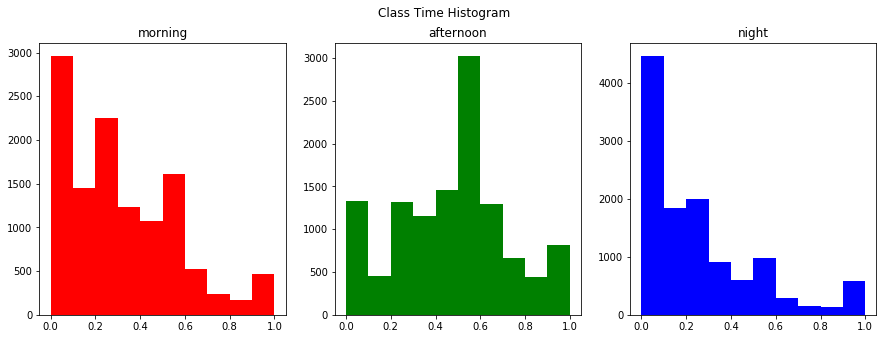

In [38]:
import matplotlib.pyplot as plt

df_hour4 = df_hour
df_hour4['morning_r'] = round(df_hour["morning_sum"]/df_hour["morning_count"], 2)
df_hour4['afternoon_r'] = round(df_hour["afternoon_sum"]/df_hour["morning_count"],2)
df_hour4['night_r'] = round(1 - df_hour['morning_r'] - df_hour['afternoon_r'],2)

fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Class Time Histogram')

ax1.hist(df_hour4['morning_r'], color='r', label='Morning')
ax1.set_title('morning')
ax2.hist(df_hour4['afternoon_r'],  color='g', label='Afternoon')
ax2.set_title('afternoon')
ax3.hist(df_hour4['night_r'],   color='b', label='Night')
ax3.set_title('night')
 

## Group by Student's Three Ratios (morning_r, afternoon_r, night_r) and Visualize the top 10 Groups in Stacked Bar Graph

there are total 10139 students


Text(0, 0.5, 'Ratio of Morning/Afternoon/Night')

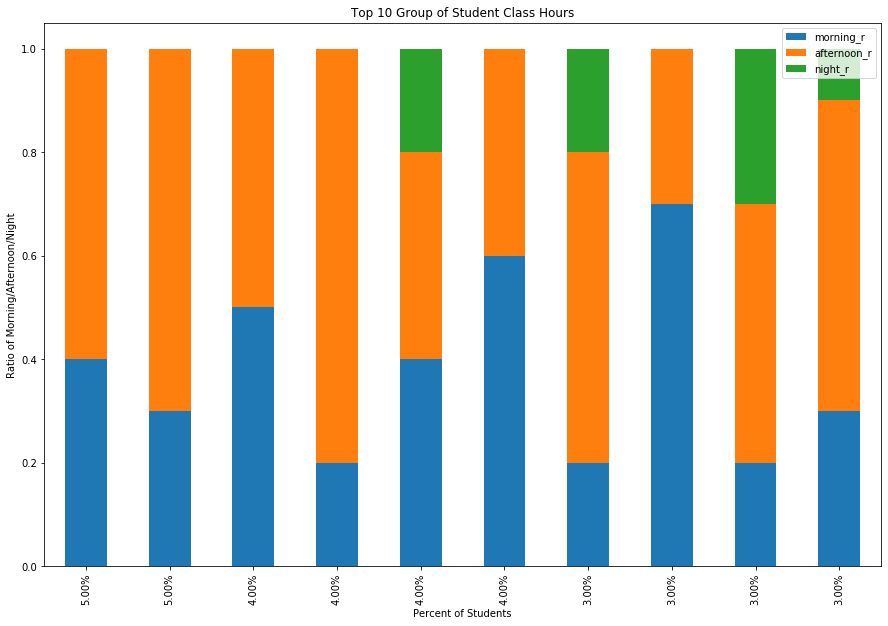

In [39]:
df_hour2 = df_hour
df_hour2['morning_r'] = round(df_hour2["morning_sum"]/df_hour2["morning_count"], 1)
df_hour2['afternoon_r'] = round(df_hour2["afternoon_sum"]/df_hour2["morning_count"],1)
df_hour2['night_r'] = round(1 - df_hour2['morning_r'] - df_hour2['afternoon_r'],1)

df_hour2 = df_hour2[ df_hour2['morning_count'] >= 3 ]
print("there are total "+ str(df_hour2.shape[0]) + " students")

df_hour3 = df_hour2.groupby(['morning_r', 'afternoon_r', 'night_r']).agg({'morning_r': ['count']})
df_hour3.columns = ['_'.join(x) for x in df_hour3.columns.ravel()]
df_hour3 = df_hour3.reset_index()
df_hour3 = df_hour3.sort_values(by=['morning_r_count'],  ascending=False)
df_hour3['row_num'] = np.arange(len(df_hour3))
#df_hour1.columns()

df_hour3['num'] = round(df_hour3['morning_r_count'] / df_hour3['morning_r_count'].sum(), 2)
df_hour3 = df_hour3[df_hour3['row_num'] < 10 ]

df_hour3['num'] = df_hour3['num'].astype(float).map("{:.2%}".format)
df_hour3.plot(x="num", y=['morning_r', 'afternoon_r', 'night_r'], kind='bar',  stacked=True, figsize=(15, 10))

plt.title("Top 10 Group of Student Class Hours")
plt.xlabel("Percent of Students")
plt.ylabel("Ratio of Morning/Afternoon/Night")

## Group by Student's Three Ratios (morning_r, afternoon_r, night_r) and Visualize the top 10 Groups in Bar Graph (Three Bars for Three Ratios Per Group)

Text(0, 0.5, 'Ratio of Morning/Afternoon/Night')

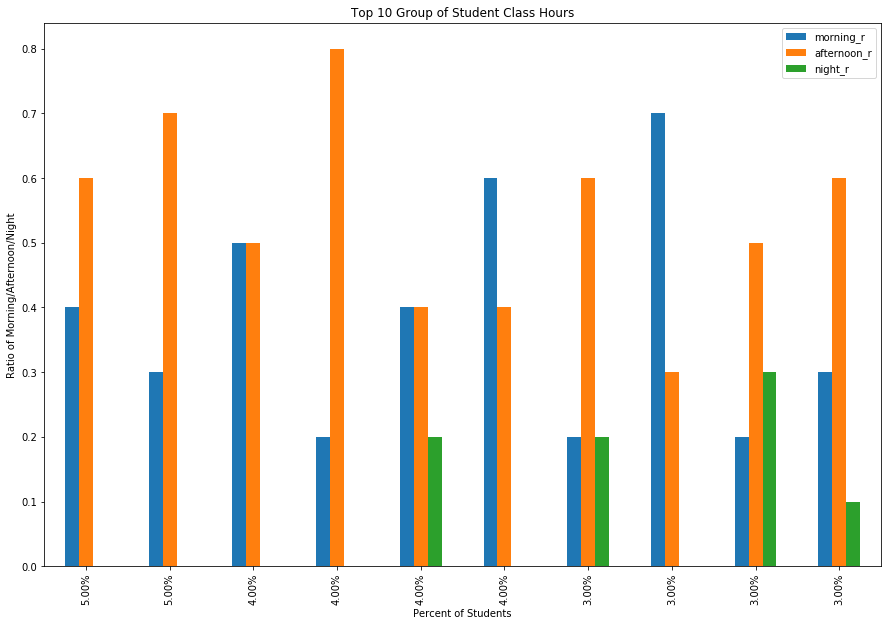

In [40]:
df_hour3.plot(x="num", y=['morning_r', 'afternoon_r', 'night_r'], kind='bar',   figsize=(15, 10))

plt.title("Top 10 Group of Student Class Hours")
plt.xlabel("Percent of Students")
plt.ylabel("Ratio of Morning/Afternoon/Night")

In [41]:
df_ttest["class_MW"] = np.where( ((df_ttest["CLASSM_MONDAY"] == 'Y')  | (df_ttest["CLASSM_WEDNESDAY"] == 'Y')) , 1, 0) 
df_ttest["class_TT"] = np.where( ((df_ttest["CLASSM_TUESDAY"] == 'Y')  | (df_ttest["CLASSM_THURSDAY"] == 'Y')) , 1, 0) 

df_date = df_ttest.groupby(['EMPLID']).agg({'class_MW': ['sum', 'count'], 'class_TT': ['sum']})
df_date.columns = ['_'.join(x) for x in df_date.columns.ravel()]
print(df_date.head())

              class_MW_sum  class_MW_count  class_TT_sum
EMPLID                                                  
QBX0A0A1K0V6             2               2             0
QBX0A0A2A1T5             0               3             3
QBX0A0A4X0Y0             0               1             1
QBX0A0A5X9V1             1               1             0
QBX0A0A5Z4U6             2               4             2


## Histogram of All Student's MW/TT  course enrollments

Text(0.5, 1.0, 'Tus/Thur Ratio')

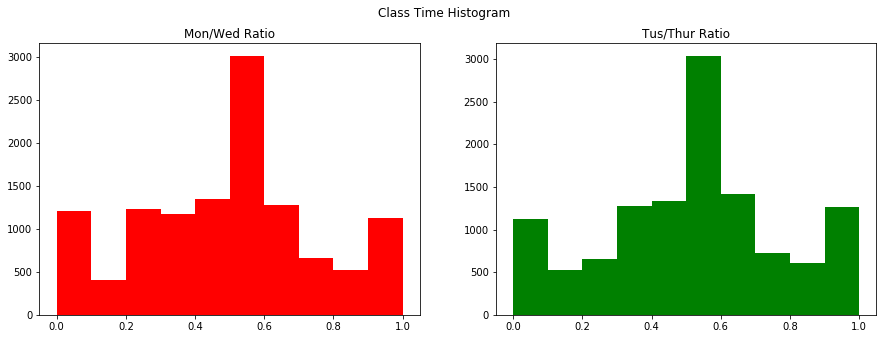

In [42]:
df_date1 = df_date
df_date1['mw_r'] = round(df_date1["class_MW_sum"]/df_date1["class_MW_count"], 2)
df_date1['tt_r'] = 1 - df_date1['mw_r'] 

fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Class Time Histogram')

ax1.hist(df_date1['mw_r'], color='r', label='Mon/Wed Ratio')
ax1.set_title('Mon/Wed Ratio')
ax2.hist(df_date1['tt_r'],  color='g', label='Tus/Thur Ratio')
ax2.set_title('Tus/Thur Ratio')

## Group by Student's MW/TT Ratios (mw_r,tt_r) and Visualize the ordered Groups in Stacked Bar Graph

there are total 10139 students


Text(0, 0.5, 'Ratio of MW/TT')

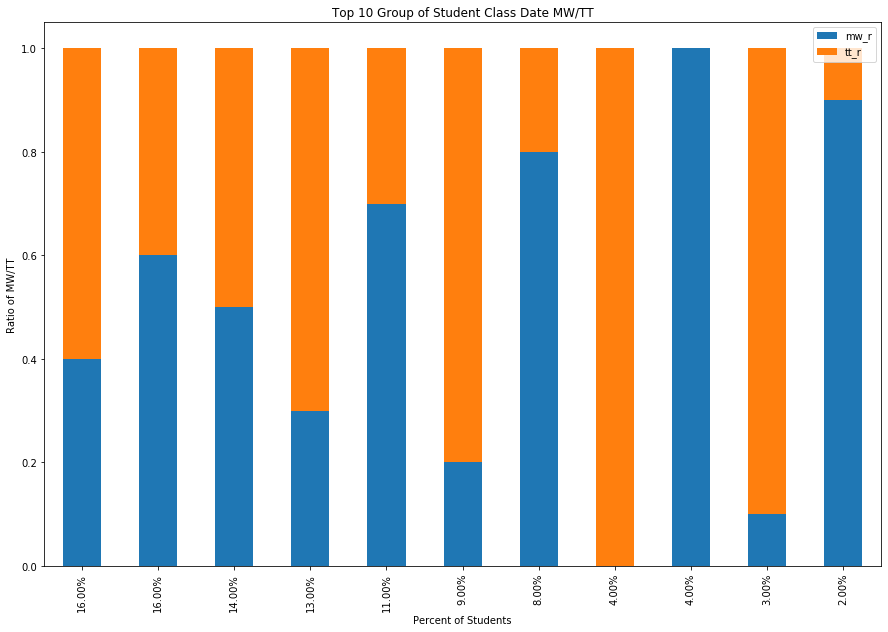

In [43]:
df_date2 = df_date
df_date2['mw_r'] = round(df_date2["class_MW_sum"]/df_date1["class_MW_count"], 1)
df_date2['tt_r'] = 1 - df_date2['mw_r'] 

df_date2 = df_date2[ df_date2['class_MW_count'] >= 3 ]

print("there are total "+ str(df_date2.shape[0]) + " students")

df_date3 = df_date2.groupby(['mw_r', 'tt_r']).agg({'mw_r': ['count']})
df_date3.columns = ['_'.join(x) for x in df_date3.columns.ravel()]
df_date3 = df_date3.reset_index()
df_date3 = df_date3.sort_values(by=['mw_r_count'],  ascending=False)
df_date3['row_num'] = np.arange(len(df_date3))
#df_hour1.columns()

df_date3['num'] = round(df_date3['mw_r_count'] / df_date3['mw_r_count'].sum(), 2)

df_date3['num'] = df_date3['num'].astype(float).map("{:.2%}".format)
df_date3.plot(x="num", y=['mw_r', 'tt_r'], kind='bar',  stacked=True, figsize=(15, 10))

plt.title("Top 10 Group of Student Class Date MW/TT")
plt.xlabel("Percent of Students")
plt.ylabel("Ratio of MW/TT")

## Group by Student's Class Date Ratios (mw_r, tt_r) and Visualize ordered Groups in Bar Graph (Two Bars for TwoThree Ratios Per Group)

Text(0, 0.5, 'Ratio of MW/TT')

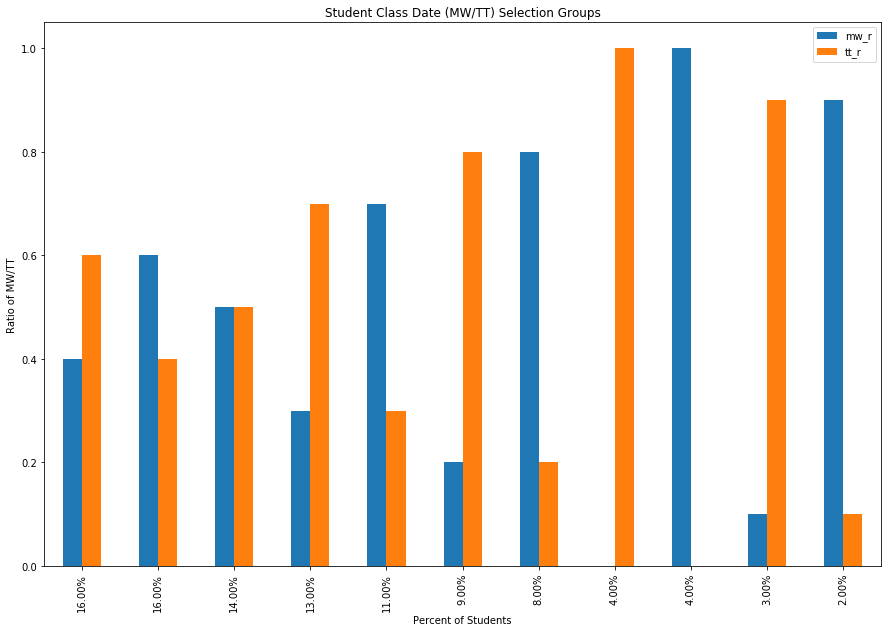

In [44]:
df_date3.plot(x="num", y=['mw_r', 'tt_r'], kind='bar',   figsize=(15, 10))

plt.title("Student Class Date (MW/TT) Selection Groups")
plt.xlabel("Percent of Students")
plt.ylabel("Ratio of MW/TT")

In [45]:
df_ttest

df_term = df_hyp5
df_term['course_time'] = df_term["CTERM_TERM_LDESC"].apply(lambda x: datetime.strptime(x.replace("Fall","09 01").replace("Spring","03 01").replace("Summer","06 01"), "%m %d %Y"))
df_term.head()


,CTERM_TERM_LDESC,CLASS_TERM,EMPLID,STUDENT_ACAD_CAREER,STUDENT_ACAD_PROG_PRIM_LDESC,STUDENT_COLLEGE_CODE,STUDENT_DEPT_CODE,STUDENT_ACAD_PLAN,STUDENT_SUBACAD_PLAN,CLASS_SID,CLASS_COLLEGE_CODE,CLASS_DEPT,CLASS_SUBDEPT,CLASS_I,CLASS_DESCR,ONLINE_COURSE,ENRL_UNITS_TAKEN,ENRL_GRADING_BASIS,ENRL_OFFICIAL_GRADE,CLASS_STDN_MTG_PAT,CLASSM_MEETING_TIME_START,CLASSM_MONDAY,CLASSM_TUESDAY,CLASSM_WEDNESDAY,CLASSM_THURSDAY,CLASSM_FRIDAY,CLASSM_SATURDAY,CLASSM_SUNDAY,STUDENT_TYPE_FINAL,RES_TUITION_RESIDENCY,course_date,course_counts,start_date,end_date,score,lesson,units,GPA,quantGPA,hour,morning,afternoon,night,dayhour,quantitative,course_start_time,study_length,junior_year,class_time,class_MW,class_TT,course_time
0,Fall 2009,2094,QBX0A0A1K0V6,Undergraduate,Undergraduate Degree,CBA,FIN,International Business BS,NaN,24209,CBA,Management,Human Resources Management,HRM 360 08,Organizational Behavior,Not_Online,3,GRD,C,MW,15:30:00,Y,N,Y,N,N,N,N,Returning UG,R,2009-09-01,4,2009-09-01,2011-03-01,2,HRM 360,3,2.0,NaN,15,0,1,0,1,0,0 days,546 days,1,2,1,0,2009-09-01
1,Spring 2011,2112,QBX0A0A1K0V6,Undergraduate,Undergraduate Degree,CBA,FIN,International Business BS,OTHLANGU1,29574,CBA,Marketing,NaN,MKTG 300 02,Marketing,Not_Online,3,GCR,C,M,19:00:00,Y,N,N,N,N,N,N,Continuing UG,R,2011-03-01,4,2009-09-01,2011-03-01,2,MKTG 300,3,2.0,NaN,19,0,0,1,0,0,546 days,546 days,1,3,1,0,2011-03-01
2,Spring 2009,2092,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,35832,CBA,Management,NaN,MGMT 425 12,Business Strategy & Policy,Not_Online,3,GRD,B,TU,19:00:00,N,Y,N,N,N,N,N,Continuing UG,R,2009-03-01,8,2009-03-01,2010-09-01,3,MGMT 425,3,2.0,1.0,19,0,0,1,0,0,0 days,549 days,1,3,0,1,2009-03-01
3,Spring 2009,2092,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,36626,CBA,Management,Human Resources Management,HRM 360 08,Organizational Behavior,Not_Online,3,GRD,C,TTH,17:30:00,N,Y,N,Y,N,N,N,Continuing UG,R,2009-03-01,8,2009-03-01,2010-09-01,2,HRM 360,3,2.0,1.0,17,0,1,0,1,0,0 days,549 days,1,2,0,1,2009-03-01
4,Fall 2009,2094,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,29153,CBA,Information Systems,NaN,I S 310 11,Business Statistics I,Not_Online,3,GRD,D,TH,19:00:00,N,N,N,Y,N,N,N,Continuing UG,R,2009-09-01,8,2009-03-01,2010-09-01,1,I S 310,3,2.0,1.0,19,0,0,1,0,1,184 days,549 days,1,3,0,1,2009-09-01


In [46]:
df_term = df_ttest
#print(df_term.shape)
df_term['course_time'] = df_term["CTERM_TERM_LDESC"].apply(lambda x: datetime.strptime(x.replace("Fall","09 01").replace("Spring","03 01").replace("Summer","06 01"), "%m %d %Y"))
#print(df_term.head())
df_term1 = df_term[df_term['course_time'] == df_term['start_date']] 
#print(df_term1.head())

df_term1['semaster'] = df_term1['CTERM_TERM_LDESC'].apply(lambda x: x.split()[1] + ' ' +  x.split()[0])

df_term2 = df_term1.groupby(['semaster','STUDENT_ACAD_PLAN']).agg({'EMPLID': ['count']}).reset_index()

df_term2.to_csv('enrollment.csv')


<Figure size 432x288 with 0 Axes>

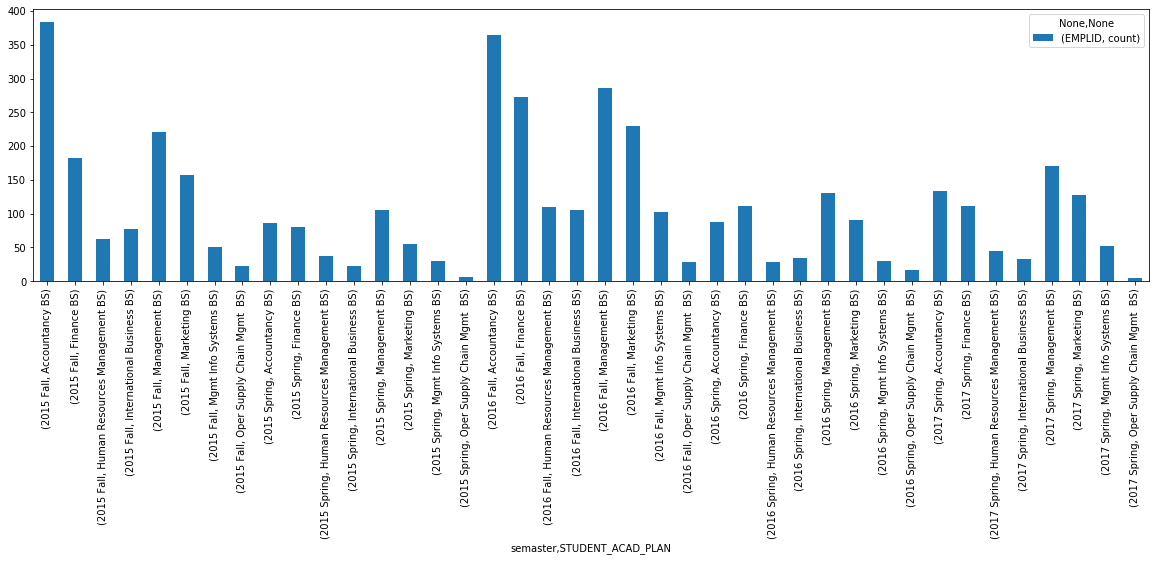

In [47]:
#df_term2.plot(x="semaster", y=['EMPLID'], kind='bar',   figsize=(15, 10))
df_term3 = df_term1.loc[df_term1['course_time'] > '2015-01-01']

plt.figure()
df_term3.groupby(['semaster','STUDENT_ACAD_PLAN']).agg({'EMPLID': ['count']}).plot(kind='bar',figsize=(20, 5))
plt.show()

In [48]:
df_term1

,CTERM_TERM_LDESC,CLASS_TERM,EMPLID,STUDENT_ACAD_CAREER,STUDENT_ACAD_PROG_PRIM_LDESC,STUDENT_COLLEGE_CODE,STUDENT_DEPT_CODE,STUDENT_ACAD_PLAN,STUDENT_SUBACAD_PLAN,CLASS_SID,CLASS_COLLEGE_CODE,CLASS_DEPT,CLASS_SUBDEPT,CLASS_I,CLASS_DESCR,ONLINE_COURSE,ENRL_UNITS_TAKEN,ENRL_GRADING_BASIS,ENRL_OFFICIAL_GRADE,CLASS_STDN_MTG_PAT,CLASSM_MEETING_TIME_START,CLASSM_MONDAY,CLASSM_TUESDAY,CLASSM_WEDNESDAY,CLASSM_THURSDAY,CLASSM_FRIDAY,CLASSM_SATURDAY,CLASSM_SUNDAY,STUDENT_TYPE_FINAL,RES_TUITION_RESIDENCY,course_date,course_counts,start_date,end_date,score,lesson,units,GPA,quantGPA,hour,morning,afternoon,night,dayhour,quantitative,course_start_time,study_length,junior_year,class_time,class_MW,class_TT,course_time,semaster
0,Fall 2009,2094,QBX0A0A1K0V6,Undergraduate,Undergraduate Degree,CBA,FIN,International Business BS,NaN,24209,CBA,Management,Human Resources Management,HRM 360 08,Organizational Behavior,Not_Online,3,GRD,C,MW,15:30:00,Y,N,Y,N,N,N,N,Returning UG,R,2009-09-01,4,2009-09-01,2011-03-01,2,HRM 360,3,2.00,NaN,15,0,1,0,1,0,0 days,546 days,1,2,1,0,2009-09-01,2009 Fall
2,Spring 2009,2092,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,35832,CBA,Management,NaN,MGMT 425 12,Business Strategy & Policy,Not_Online,3,GRD,B,TU,19:00:00,N,Y,N,N,N,N,N,Continuing UG,R,2009-03-01,8,2009-03-01,2010-09-01,3,MGMT 425,3,2.00,1.0,19,0,0,1,0,0,0 days,549 days,1,3,0,1,2009-03-01,2009 Spring
3,Spring 2009,2092,QBX0A0A2A1T5,Undergraduate,Undergraduate Degree,CBA,FIN,Finance BS,FINAN MGMT,36626,CBA,Management,Human Resources Management,HRM 360 08,Organizational Behavior,Not_Online,3,GRD,C,TTH,17:30:00,N,Y,N,Y,N,N,N,Continuing UG,R,2009-03-01,8,2009-03-01,2010-09-01,2,HRM 360,3,2.00,1.0,17,0,1,0,1,0,0 days,549 days,1,2,0,1,2009-03-01,2009 Spring
6,Fall 2009,2094,QBX0A0A5X9V1,Undergraduate,Undergraduate Degree,CBA,I S,Mgmt Info Systems BS,APP DEVEL,23908,CBA,Management,NaN,MGMT 300 05,Principles of Management,Not_Online,3,GRD,B,MW,9:30:00,Y,N,Y,N,N,N,N,Continuing UG,R,2009-09-01,2,2009-09-01,2010-03-01,3,MGMT 300,3,3.00,NaN,9,1,0,0,1,0,0 days,181 days,1,1,1,0,2009-09-01,2009 Fall
7,Spring 2009,2092,QBX0A0A5Z4U6,Undergraduate,Undergraduate Degree,CBA,ACCT,Accountancy BS,NaN,33981,CBA,Finance,NaN,FIN 300 04,Business Finance,Not_Online,3,GRD,A,TH,19:00:00,N,N,N,Y,N,N,N,Continuing UG,R,2009-03-01,12,2009-03-01,2010-03-01,4,FIN 300,3,3.75,4.0,19,0,0,1,0,1,0 days,365 days,1,3,0,1,2009-03-01,2009 Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79912,Spring 2017,2172,QBX0B6C6Z6A1,Undergraduate,Undergraduate Degree,CBA,I S,Mgmt Info Systems BS,NaN,36394,CBA,Management,NaN,MGMT 300 07,Princip of Mgmt and Operations,Not_Online,3,GRD,A,TU,19:00:00,N,Y,N,N,N,N,N,NEW Transfer (Other UG),NaN,2017-03-01,5,2017-03-01,2017-03-01,4,MGMT 300,3,3.50,3.0,19,0,0,1,0,0,0 days,0 days,1,3,0,1,2017-03-01,2017 Spring
79913,Spring 2017,2172,QBX0B6C6Z6A1,Undergraduate,Undergraduate Degree,CBA,I S,Mgmt Info Systems BS,NaN,20432,CBA,Management,Human Resources Management,HRM 360 02,Organizational Behavior,Not_Online,3,GRD,B,M,19:00:00,Y,N,N,N,N,N,N,NEW Transfer (Other UG),NaN,2017-03-01,5,2017-03-01,2017-03-01,3,HRM 360,3,3.50,3.0,19,0,0,1,0,0,0 days,0 days,1,3,1,0,2017-03-01,2017 Spring
79914,Spring 2017,2172,QBX0B6C6Z6A1,Undergraduate,Undergraduate Degree,CBA,I S,Mgmt Info Systems BS,NaN,9598,CBA,Information Systems,NaN,I S 300 16,Management Information Systems,Not_Online,3,GRD,A,TTH,11:00:00,N,Y,N,Y,N,N,N,NEW Transfer (Other UG),NaN,2017-03-01,5,2017-03-01,2017-03-01,4,I S 300,3,3.50,3.0,11,1,0,0,1,0,0 days,0 days,1,1,0,1,2017-03-01,2017 Spring
79915,Spring 2017,2172,QBX0B6C7K5X0,Undergraduate,Undergraduate Degree,CBA,ACCT,Accountancy BS,NaN,21137,CBA,Business Law,NaN,BLAW 320 11,Legal & Regulatry Env Business,Not_Online,3,GRD,D,TH,19:00:00,N,N,N,Y,N,N,N,NEW Transfer (Other UG),NaN,20

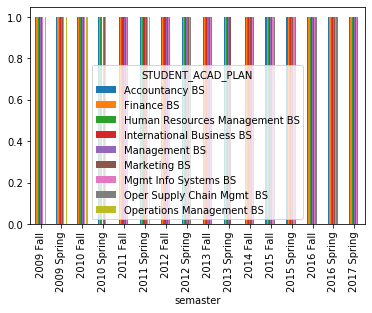

In [49]:

pd.crosstab(df_term2['semaster'],df_term2['STUDENT_ACAD_PLAN']).plot.bar()

In [65]:
df_major = df_ttest[["EMPLID", "STUDENT_ACAD_PLAN", "course_date", "CTERM_TERM_LDESC"]]
df_major = df_major.drop_duplicates()

df_major1 = df_major.sort_values(by=['EMPLID','course_date'])
df_major1["prev_STUDENT_ACAD_PLAN"]  = df_major1.STUDENT_ACAD_PLAN.shift(1)
df_major1["prev_EMPLID"] = df_major1.EMPLID.shift(1)

df_major1['major_change'] = np.where((df_major1['EMPLID'] == df_major1['prev_EMPLID']) & (df_major1['STUDENT_ACAD_PLAN'] != df_major1['prev_STUDENT_ACAD_PLAN'])
                     , 1,  0)

df_major3 = df_major1.groupby(['STUDENT_ACAD_PLAN', 'prev_STUDENT_ACAD_PLAN'])['major_change'].sum().reset_index().rename(columns={'major_change':'total_major_change', 'prev_STUDENT_ACAD_PLAN': 'major_from', 'STUDENT_ACAD_PLAN': 'major_to'}) 
df_major3.head(100)

df_major3 = df_major3.sort_values(by=['total_major_change'], ascending=False)
#df_major4 = np.where((df_major3['major_to'] != df_major3['major_from']))
#df_major3.to_csv("major_change.csv")


In [111]:
df_major1 = df_ttest
df_major1['course_time'] = df_major1["CTERM_TERM_LDESC"].apply(lambda x: datetime.strptime(x.replace("Fall","09 01").replace("Spring","03 01").replace("Summer","06 01"), "%m %d %Y"))
df_major1['is310_time'] = df_major1.apply(lambda x : x['course_time'] if x['lesson'] == 'I S 310'  else datetime.strptime("12 31 2099", "%m %d %Y") ,axis=1)
df_major1['is310_score'] = df_major1.apply(lambda x : x['score'] if x['lesson'] == 'I S 310'  else np.nan ,axis=1)

df_major1['fin300_time'] = df_major1.apply(lambda x : x['course_time'] if x['lesson'] == 'FIN 300'  else datetime.strptime("12 31 2099", "%m %d %Y") ,axis=1)
df_major1['fin300_score'] = df_major1.apply(lambda x : x['score'] if x['lesson'] == 'FIN 300'  else np.nan ,axis=1)

df_is310_t = df_major1.groupby(['EMPLID'])['is310_time'].min().reset_index()
df_is310_s = df_major1.groupby(['EMPLID'])['is310_score'].max().reset_index()
df_fin300_t = df_major1.groupby(['EMPLID'])['fin300_time'].min().reset_index()
df_fin300_s = df_major1.groupby(['EMPLID'])['fin300_score'].max().reset_index()

df_is310_t.head()

df_class = pd.concat([df_is310_t, df_is310_s], axis=1)

df_class.head()

,EMPLID,is310_time,EMPLID,is310_score
0,QBX0A0A1K0V6,2099-12-31,QBX0A0A1K0V6,NaN
1,QBX0A0A2A1T5,2009-09-01,QBX0A0A2A1T5,1.0
2,QBX0A0A4X0Y0,2099-12-31,QBX0A0A4X0Y0,NaN
3,QBX0A0A5X9V1,2099-12-31,QBX0A0A5X9V1,NaN
4,QBX0A0A5Z4U6,2009-03-01,QBX0A0A5Z4U6,4.0


In [127]:
print(df_is310_t.shape)
print(df_is310_s.shape)
print(df_fin300_t.shape)
print(df_fin300_s.shape)

df_class = pd.concat([df_is310_t, df_is310_s, df_fin300_t, df_fin300_s], axis=1).reset_index()
df_class = df_class.loc[:,~df_class.columns.duplicated()]
print(df_class.shape)

(11962, 2)
(11962, 2)
(11962, 2)
(11962, 2)
(11962, 6)


In [167]:
df_major = df_ttest[["EMPLID", "STUDENT_ACAD_PLAN", "course_date", "CTERM_TERM_LDESC"]]
df_major = df_major.drop_duplicates()

df_major2 = df_major.sort_values(by=['EMPLID','course_date'])
df_major2["prev_STUDENT_ACAD_PLAN"]  = df_major2.STUDENT_ACAD_PLAN.shift(1)
df_major2["prev_EMPLID"] = df_major2.EMPLID.shift(1)
#print(df_major2.shape)
df_major2 = df_major2.merge(df_class, on = ['EMPLID'], how ='left') 

df_major2['new_is310_score'] = df_major2.apply(lambda x : x['is310_score'] if ( x['is310_time'] <= x['course_date'] and  x['STUDENT_ACAD_PLAN'] != x['prev_STUDENT_ACAD_PLAN'])  else np.nan ,axis=1)
df_major2['new_fin300_score'] = df_major2.apply(lambda x : x['fin300_score'] if ( x['fin300_time'] <= x['course_date'] and x['STUDENT_ACAD_PLAN'] != x['prev_STUDENT_ACAD_PLAN'])  else np.nan ,axis=1)


df_major2['major_change'] = np.where((df_major2['EMPLID'] == df_major2['prev_EMPLID']) & (df_major2['STUDENT_ACAD_PLAN'] != df_major2['prev_STUDENT_ACAD_PLAN'])
                    , 1,  0)

#df_major2 = df_major2[df_major2["new_is310_score"].notna()] 
#df_major2 = df_major2[df_major2["new_fin300_score"].notna()] 
df_major3 = df_major2.groupby(['STUDENT_ACAD_PLAN', 'prev_STUDENT_ACAD_PLAN']).agg({'major_change':'sum', 'new_is310_score':'mean','new_fin300_score':'mean'}).reset_index().rename(columns={'new_is310_score':'is310', 'new_fin300_score':'fin300'})
 
df_major3 = df_major3.sort_values(by=['major_change'], ascending=False)


#df_major4 = np.where((df_major3['major_to'] != df_major3['major_from']))
df_major3.to_csv("major_change_gpa.csv")

df_major3.head(100)

,STUDENT_ACAD_PLAN,prev_STUDENT_ACAD_PLAN,major_change,is310,fin300
9,Finance BS,Accountancy BS,197,2.552147,2.943243
49,Marketing BS,Management BS,130,2.506579,2.731429
13,Finance BS,Management BS,110,2.698529,3.105469
36,Management BS,Accountancy BS,109,2.387597,2.683721
45,Marketing BS,Accountancy BS,98,2.377483,2.609890
...,...,...,...,...,...
30,International Business BS,International Business BS,0,NaN,NaN
20,Human Resources Management BS,Human Resources Management BS,0,NaN,NaN
10,Finance BS,Finance BS,0,NaN,NaN
7,Accountancy BS,Oper Supply Chain Mgmt BS,0,3.250000,3.000000


In [192]:
def run_ttest_on_change(from_major1, to_major1, from_major2, to_major2, score_lesson):
    df1 = df_major2[ df_major2['STUDENT_ACAD_PLAN']== to_major1  ]
    df1 = df1[ df1['prev_STUDENT_ACAD_PLAN']== from_major1] 
    df1 = df1[df1[score_lesson].notna()] 
    
    df2 = df_major2[ df_major2['STUDENT_ACAD_PLAN']== to_major2  ]
    df2 = df2[ df2['prev_STUDENT_ACAD_PLAN']== from_major2] 
    df2 = df2[df2[score_lesson].notna()] 
    
    return  scipy.stats.ttest_ind(df1[score_lesson], df2[score_lesson]), (df1[score_lesson].mean(), df2[score_lesson].mean())
   

t_test_results = {}
scores = {}
    
fr = [("Accountancy BS","Finance BS"), ("Accountancy BS","Finance BS"), ("Management BS","Finance BS")]
to = [("Accountancy BS","Marketing BS"), ("Accountancy BS","Management BS"), ("Management BS","Marketing BS")]
 
def run_lesson(lesson):    
    for i in range(3):
        from_major1 = fr[i][0]
        to_major1 = fr[i][1]

        from_major2 = to[i][0]
        to_major2 = to[i][1]

        name = from_major1[:-3] + "_" + to_major1[:-3] + " vs " + from_major2[:-3] + "_" + to_major2[:-3] 
        t_test_results[name], scores[name] = run_ttest_on_change(from_major1, to_major1, from_major2, to_major2, lesson)

        results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
        scores_df = pd.DataFrame.from_dict(scores, orient='Index')
     
        results_df['Group1'] = scores_df[0].to_numpy()
        results_df['Group2'] = scores_df[1].to_numpy()
        
    return results_df
 
df_lesson1 = run_lesson("new_is310_score")
df_lesson1.to_csv("is310_ttest.csv")

In [193]:
df_lesson2 = run_lesson("new_fin300_score")
df_lesson2.to_csv("fin300_ttest.csv")